**Saad Khan and Nithun Selva**

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Week 3: Strategies for training deeper networks

The focus this week is on strategies for training deeper neural networks. We will touch on:
1. Improved weight initialization techniques.
2. Using dropout.
3. Using regularization.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

### 6c. Add support for He/Kaiming initialization

Continuing on with our goal of improving our training workflow, let's implement He/Kaiming initialization weight initialization in layers that contain weights (`'he'` method). We want to maintain support for the current way weights are initialized (`'normal'` method) so that we can switch between the method used to initialize the weights. In summary, the process involves a) adding support for `'he'` weight initialization in layers with weights and b) adding keyword arguments to allow switching between the weight initialization methods.

Here are the changes to make:
1. In `Layer`, implement `get_kaiming_gain` to get the activation function dependent Kaiming gain $\kappa$.
2. If you have not already done so, add instance vars for the  `wt_init` parameter in:
   1. `Dense` constructor
   2. `Conv2D` constructor
   3. `VGG4` constructor
   4. `VGGConvBlock` constructor
   5. `VGGDenseBlock` constructor
   6. `VGG6` constructor
3. In the following places, initialize the weights and bias in the way you are currently are if using the `'normal'` the weight initialization method (*the default in all layers so far*). Otherwise, use He/Kaiming:
   1. `Dense` `init_params`
   2. `Conv2D` `init_params`
4. Make sure you are passing the `wt_init` parameter setting along when making layers/blocks in the following places:
   1. `VGGConvBlock`
   2. `VGGDenseBlock`
   3. `VGG4`
   4. `VGG6`

In [3]:
from layers import Dense, Conv2D
from block import VGGConvBlock, VGGDenseBlock
from vgg_nets import VGG4, VGG6

#### Test `Dense`

Also re-run previous tests in the `build_deeplib` notebook to make sure adding support for He/Kaiming initialization does not affect `'normal'` initialzation.

In [3]:
tf.random.set_seed(0)
d = Dense('Test', units=3, wt_init='he')
d(tf.ones([2, 4]))
print(f'Your wts are\n{d.get_wts().numpy()} and should be')
print('''[[ 1.068  0.299 -0.297]
 [-0.733 -0.875  0.333]
 [-0.01   0.841  0.426]
 [ 0.424 -0.499 -0.306]]''')
print(f'Your biases are\n{d.get_b().numpy()} and should be')
print('[0. 0. 0.]')

I0000 00:00:1740722501.331745   14814 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


Your wts are
[[ 1.068  0.299 -0.297]
 [-0.733 -0.875  0.333]
 [-0.01   0.841  0.426]
 [ 0.424 -0.499 -0.306]] and should be
[[ 1.068  0.299 -0.297]
 [-0.733 -0.875  0.333]
 [-0.01   0.841  0.426]
 [ 0.424 -0.499 -0.306]]
Your biases are
[0. 0. 0.] and should be
[0. 0. 0.]


#### Test `Conv2D`

Also re-run previous tests in the `build_deeplib` notebook to make sure adding support for He/Kaiming initialization does not affect `'normal'` initialzation.

In [4]:
tf.random.set_seed(0)
c = Conv2D('Test', units=3, wt_init='he', kernel_size=(2,2))
c(tf.ones([1, 6, 6, 2]))
print(f'Your wts are\n{c.get_wts().numpy()} and should be')
print('''[[[[ 0.756  0.211 -0.21 ]
   [-0.518 -0.618  0.235]]

  [[-0.007  0.594  0.301]
   [ 0.3   -0.353 -0.216]]]


 [[[ 0.397 -0.349 -0.48 ]
   [-0.45  -0.18  -0.112]]

  [[ 0.152  0.261  0.078]
   [ 0.794 -0.398  0.039]]]]''')
print(f'Your biases are\n{c.get_b().numpy()} and should be')
print('[0. 0. 0.]')

Your wts are
[[[[ 0.756  0.211 -0.21 ]
   [-0.518 -0.618  0.235]]

  [[-0.007  0.594  0.301]
   [ 0.3   -0.353 -0.216]]]


 [[[ 0.397 -0.349 -0.48 ]
   [-0.45  -0.18  -0.112]]

  [[ 0.152  0.261  0.078]
   [ 0.794 -0.398  0.039]]]] and should be
[[[[ 0.756  0.211 -0.21 ]
   [-0.518 -0.618  0.235]]

  [[-0.007  0.594  0.301]
   [ 0.3   -0.353 -0.216]]]


 [[[ 0.397 -0.349 -0.48 ]
   [-0.45  -0.18  -0.112]]

  [[ 0.152  0.261  0.078]
   [ 0.794 -0.398  0.039]]]]
Your biases are
[0. 0. 0.] and should be
[0. 0. 0.]


I0000 00:00:1740722501.773216   14814 cuda_dnn.cc:529] Loaded cuDNN version 90300


#### Test `VGGConvBlock`

In [5]:
tf.random.set_seed(0)
v = VGGConvBlock('Test', units=3, wt_init='he', prev_layer_or_block=None)
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 6, 6, 2]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[[[0.539 0.798 0.174]
   [1.075 0.599 0.   ]
   [0.713 0.7   0.   ]]

  [[0.497 1.139 0.191]
   [0.826 1.057 0.075]
   [0.506 1.095 0.   ]]

  [[0.358 0.638 0.168]
   [0.547 0.29  0.189]
   [0.726 0.337 0.111]]]]''')

Your net_acts are
[[[[0.539 0.798 0.174]
   [1.075 0.599 0.   ]
   [0.713 0.7   0.   ]]

  [[0.497 1.139 0.191]
   [0.826 1.057 0.075]
   [0.506 1.095 0.   ]]

  [[0.358 0.638 0.168]
   [0.547 0.29  0.189]
   [0.726 0.337 0.111]]]] and should be
[[[[0.539 0.798 0.174]
   [1.075 0.599 0.   ]
   [0.713 0.7   0.   ]]

  [[0.497 1.139 0.191]
   [0.826 1.057 0.075]
   [0.506 1.095 0.   ]]

  [[0.358 0.638 0.168]
   [0.547 0.29  0.189]
   [0.726 0.337 0.111]]]]


#### Test `VGGDenseBlock`

In [6]:
tf.random.set_seed(0)
v = VGGDenseBlock('Test', units=(3,), wt_init='he', prev_layer_or_block=None)
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 4]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.565 0.    0.   ]] ''')

Your net_acts are
[[0.565 0.    0.   ]] and should be
[[0.565 0.    0.   ]] 


#### Test `VGG4`

In [7]:
tf.random.set_seed(0)
v = VGG4(C=3, input_feats_shape=(10, 10, 5), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([2, 10, 10, 5]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.369 0.382 0.249]
 [0.37  0.351 0.28 ]]''')

Your net_acts are
[[0.369 0.382 0.249]
 [0.37  0.351 0.28 ]] and should be
[[0.369 0.382 0.249]
 [0.37  0.351 0.28 ]]


#### Test `VGG6`

In [8]:
tf.random.set_seed(0)
v = VGG4(C=4, input_feats_shape=(12, 12, 4), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 12, 12, 4]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.228 0.107 0.589 0.075]]''')

Your net_acts are
[[0.228 0.107 0.589 0.075]] and should be
[[0.228 0.107 0.589 0.075]]


### 6d. Compare training VGG6 with Normal and He initialization with early stopping

Let's use VGG6 to test how He initialization and early stopping affects training with CIFAR-10. In the cell below, conduct an experiment wherein you train VGG6 repeatedly 6 times will different combinations of the following: 
- patience `[3, 4, 5]`
- Normal vs He

After training each net, store/record:
1. the network's final test accuracy.
2. the number of epochs spent training.
3. the history of training loss (averaged across mini-batches, so one per epoch).
4. the history of validation loss (checked every epoch).
5. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the networks to help prevent the memory used from growing.
- Some networks may stop very quickly — that is ok and expected!

This experiment is expected to take 30-60 mins to complete.

In [4]:
from datasets import get_dataset

x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset("cifar10")

I0000 00:00:1740968133.101165     394 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


In [10]:
patience_values = [3, 4, 5]
init_methods = ['normal', 'he']
results = []

# Train
for patience in patience_values:
    for init in init_methods:
        print(f"\nTraining VGG6 with {init} initialization and patience={patience}")
        
        # Clear session and set seeds
        tf.keras.backend.clear_session()
        #tf.random.set_seed(0)
        
        # Create and compile model
        model = VGG6(C=10, input_feats_shape=(32, 32, 3), wt_init=init)
        model.compile(optimizer='adam', lr=1e-5)
        
        # Train model
        train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(
            x_train, y_train, 
            x_val, y_val,
            patience=patience,
            verbose=True
        )
        
        # Evaluate on test set
        test_acc, test_loss = model.evaluate(x_test, y_test)

        # Store results
        results.append((init, patience, test_acc, epochs, train_loss_hist, val_loss_hist, val_acc_hist))
        


Training VGG6 with normal initialization and patience=3
---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 256]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 256]
Flatten layer output(Flatten) shape: [1, 8192]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv_1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv_0) shape: [1, 16, 16, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool) shape: [1, 16, 16, 64]
	Conv2D layer output(ConvBlock1/conv_1) shape: [1, 32, 32, 64]
	Conv2D layer output(ConvBlock1/conv_0) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


I0000 00:00:1740722513.385300   14814 service.cc:148] XLA service 0x5aeabac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740722513.385361   14814 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-02-28 01:01:53.394128: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-28 01:01:53.408784: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:61] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. cond/dropout/random_uniform/RandomUniform
I0000 00:00:1740722514.097416   14814 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/10000 - Train Loss: 2.3026, Val Loss: 2.3026, Val Acc: 0.0984
Epoch 1 completed in 9.62 seconds.
Epoch 2/10000 - Train Loss: 2.3026, Val Loss: 2.3026, Val Acc: 0.0984
Epoch 2 completed in 4.76 seconds.
Epoch 3/10000 - Train Loss: 2.3026, Val Loss: 2.3026, Val Acc: 0.0984
Epoch 3 completed in 4.76 seconds.
Early stopping at epoch 4
Finished training after 4 epochs!

Training VGG6 with he initialization and patience=3
---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 256]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 256]
Flatten layer output(Flatten) shape: [1, 8192]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv_1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv_0) shape: [1, 16, 16, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool) shape: [1, 16,

In [11]:
results = np.array(results, dtype=object)


# Print final epochs and test accuracies
for init, patience, test_acc, epochs, train_loss_hist, val_loss_hist, val_acc_hist in results:
    print(f"Init: {init}, Patience: {patience}, Test Accuracy: {test_acc:.4f}, Epochs: {epochs}\n")

Init: normal, Patience: 3, Test Accuracy: 0.1000, Epochs: 4

Init: he, Patience: 3, Test Accuracy: 0.6831, Epochs: 57

Init: normal, Patience: 4, Test Accuracy: 0.0999, Epochs: 5

Init: he, Patience: 4, Test Accuracy: 0.7174, Epochs: 90

Init: normal, Patience: 5, Test Accuracy: 0.0999, Epochs: 6

Init: he, Patience: 5, Test Accuracy: 0.7061, Epochs: 94



Use the function below to plot:
1. The training loss history.
2. The val loss history.
3. The val acc history.

Afterwards print the test accuracy for each network along wth the number of actual training epochs.

In [12]:
def plot_loss_and_acc_wt_init_exp(hists,
                                  labels=['normal3', 'he3', 'normal4', 'he4', 'normal5', 'he5'],
                                  title='',
                                  ylabel=''):
    '''Plots either the training loss history, val loss history, or val acc history for the 6 networks.

    This plotting function is provided to you. Feel free to modify to suit your needs.

    Parameters:
    -----------
    hists: list of lists. len(hists)=6. len(sublists) = E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the 6 networks.
    labels: list of str.
        The labels/order of conditions in the hists. Modify if your order does not match the default.
    title: str.
        A useful title.
    ylabel: str.
        A useful y label.
    '''
    if len(hists) != len(labels):
        print('The length of the hists needs to match the labels length — one label per history')
        return

    rng = np.random.default_rng(0)
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

    for i in range(len(labels)):
        hist = hists[i]
        label = labels[i]
        shift = rng.uniform(low=-0.1, high=0.1, size=(1,))
        if 'normal' in label:
            axes[0].plot(hist+shift, label=label)
        else:
            axes[1].plot(hist+shift, label=label)

    axes[0].legend()
    axes[1].legend()
    fig.suptitle(title)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel(ylabel)
    plt.show()


training_losses = results[:, 4]
val_losses = results[:, 5]
val_accs = results[:, 6]

# This code is here to help you plot your results and test accuracies. It will almost certainly not exactly work
# with your variables. Feel free to adapt to suit your needs or delete and use your own code.
# plot_loss_and_acc_wt_init_exp(list(training_losses),
#                               title='VGG6 CIFAR-10 training losses', ylabel='Loss')
# plot_loss_and_acc_wt_init_exp(list(val_losses),
#                               title='VGG6 CIFAR-10 val losses', ylabel='Loss')
# plot_loss_and_acc_wt_init_exp(list(val_accs),
#                               title='VGG6 CIFAR-10 val acc', ylabel='Acc')

# print('Test accs:')
# for label, acc in test_accs.items():
#     print(f'{label}: {100*acc:.2f} in {epochs[label]} epochs.')

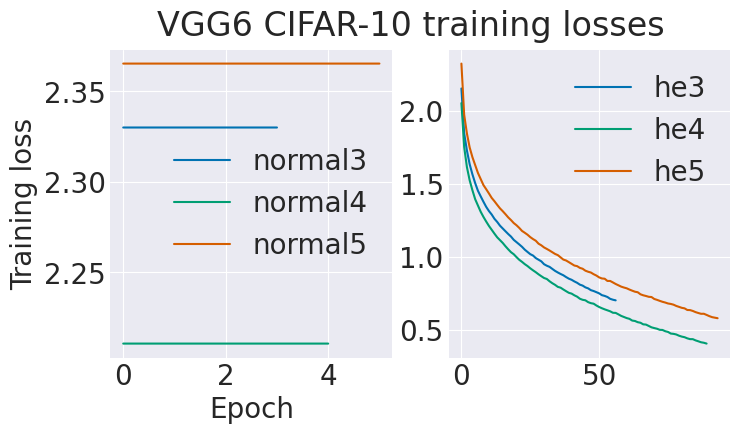

In [13]:
train_loss = results[:, 4]

plot_loss_and_acc_wt_init_exp(train_loss,
                              title='VGG6 CIFAR-10 training losses',
                              ylabel='Training loss')

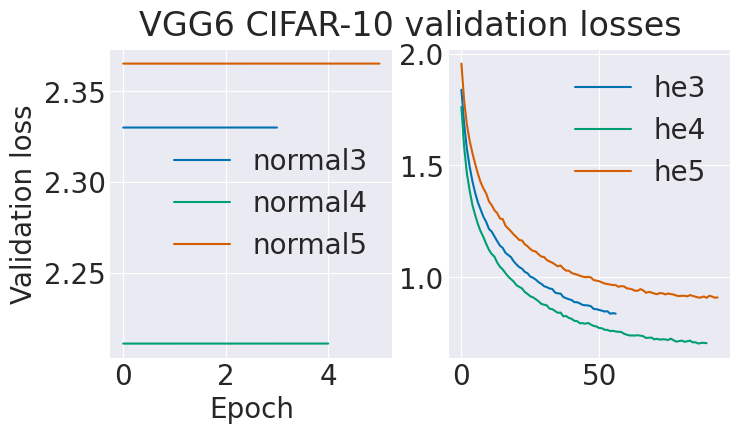

In [14]:
val_loss = results[:, 5]

plot_loss_and_acc_wt_init_exp(val_loss,
                              title='VGG6 CIFAR-10 validation losses',
                              ylabel='Validation loss')

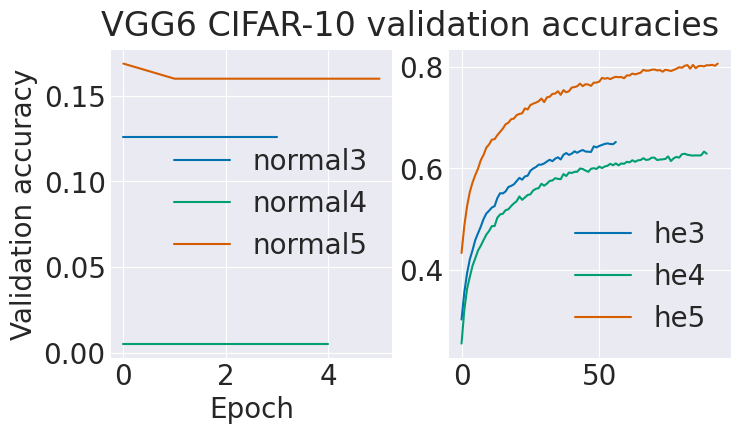

In [15]:
val_acc = results[:, 6]

plot_loss_and_acc_wt_init_exp(val_acc,
                              title='VGG6 CIFAR-10 validation accuracies',
                              ylabel='Validation accuracy')

### 6e. Questions

**Question 5:** How did the networks initialized with the Normal method compare to those initialized with He?

**Question 6:** How does the test accuracy achieved by the best performing VGG6 network compare to:
- the previous best VGG6 result you obtained (before this Task)?
- the best VGG4 result?

**Answer 5:** Normal method accuracy stays constant and very low ending in just a few epochs, while He quickly climbs in accuracy, continuing for many more epochs. In both cases, 5 performed the best, 3 performed second, and 4 performed worst.

**Answer 6:** We got 71.74% compared to the previous best of 35% and VGG4 of 68%

## Task 7: Going deeper with VGG8

With deeper networks, overfitting becomes a major concern. In this task, we will explore two ways to regularize deep neural networks and analyze the impact they have on classification accuracy.

### 7a. Implement VGG8

In `vgg_nets.py` implement the `VGG8` class. The VGG8 network has the following architecture:

Conv2D → Conv2D → MaxPool2D → Conv2D → Conv2D → MaxPool2D → Conv2D → Conv2D → MaxPool2D → Flatten → Dense → Dropout → Dense

If you copy-paste from VGG6, this should be fast.

In [10]:
from vgg_nets import VGG8

#### Test `VGG8`

In [17]:
v = VGG8(C=5, input_feats_shape=(24, 24, 10), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(Flatten) shape: [1, 2304]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool) shape: [1, 3, 3, 256]
	Conv2D layer output(ConvBlock3/conv_1) shape: [1, 6, 6, 256]
	Conv2D layer output(ConvBlock3/conv_0) shape: [1, 6, 6, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool) shape: [1, 6, 6, 128]
	Conv2D layer output(ConvBlock2/conv_1) shape: [1, 12, 12, 128]
	Conv2D layer output(ConvBlock2/conv_0) shape: [1, 12, 12, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool) shape: [1, 12, 12, 64]
	Conv2D layer output(ConvBlock1/conv_1) shape: [1, 24, 24, 64]
	Conv2D layer output(ConvBlock1/conv_0) shape: [1, 24, 24, 64]
---------------------------------------------------------------------------


The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 2304]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 3, 3, 256]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 6, 6, 256]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 6, 6, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool2) shape: [1, 6, 6, 128]
	Conv2D layer output(ConvBlock2/conv1) shape: [1, 12, 12, 128]
	Conv2D layer output(ConvBlock2/conv0) shape: [1, 12, 12, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool2) shape: [1, 12, 12, 64]
	Conv2D layer output(ConvBlock1/conv1) shape: [1, 24, 24, 64]
	Conv2D layer output(ConvBlock1/conv0) shape: [1, 24, 24, 64]
---------------------------------------------------------------------------
```


In [18]:
tf.random.set_seed(0)
v = VGG8(C=5, input_feats_shape=(12, 12, 10), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([1, 12, 12, 10]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.132 0.207 0.576 0.025 0.06 ]]''')

Your net_acts are
[[0.132 0.207 0.576 0.025 0.06 ]] and should be
[[0.132 0.207 0.576 0.025 0.06 ]]


### 7b. Effects of dropout

In the cell below, train VGG8 with and without dropout in the convolutional blocks (i.e. train 2 separate nets). Train with a patience of `4` and use He initialization.

After training each net, store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).
4. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the network to help prevent the memory used from growing.

In [19]:
# Clear session and set seeds
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Create and compile model with dropout
model = VGG8(C=10, input_feats_shape=(32, 32, 3), wt_init='he', conv_dropout=True)
model.compile(optimizer='adam', lr=1e-5)

# Train model
train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(x_train, y_train, x_val, y_val, patience=4)

# Evaluate on test set
test_acc, test_loss = model.evaluate(x_test, y_test)

# Store results
dropout_results = (test_acc, epochs, train_loss_hist, val_loss_hist, val_acc_hist)

# Clear session and set seeds
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Create and compile model without dropout
model = VGG8(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
model.compile(optimizer='adam', lr=1e-5)

# Train model
train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(x_train, y_train, x_val, y_val, patience=4)

# Evaluate on test set
test_acc, test_loss = model.evaluate(x_test, y_test)

# Store results
nodropout_results = (test_acc, epochs, train_loss_hist, val_loss_hist, val_acc_hist)
        

---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(Flatten) shape: [1, 4096]
ConvBlock3:
	Dropout layer output(ConvBlock3/dropout) shape: [1, 4, 4, 256]
	MaxPool2D layer output(ConvBlock3/maxpool) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv_0) shape: [1, 8, 8, 256]
ConvBlock2:
	Dropout layer output(ConvBlock2/dropout) shape: [1, 8, 8, 128]
	MaxPool2D layer output(ConvBlock2/maxpool) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv_1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv_0) shape: [1, 16, 16, 128]
ConvBlock1:
	Dropout layer output(ConvBlock1/dropout) shape: [1, 16, 16, 64]
	MaxPool2D layer output(ConvBlock1/maxpool) shape: [1, 16, 16, 64]
	Conv2D layer output(Con

E0000 00:00:1740723757.652527   14814 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incond/then/_0/cond/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/10000 - Train Loss: 2.7095, Val Loss: 2.1630, Val Acc: 0.2698
Epoch 1 completed in 12.96 seconds.
Epoch 2/10000 - Train Loss: 2.1686, Val Loss: 2.0000, Val Acc: 0.3077
Epoch 2 completed in 7.84 seconds.
Epoch 3/10000 - Train Loss: 2.0238, Val Loss: 1.8762, Val Acc: 0.3444
Epoch 3 completed in 8.33 seconds.
Epoch 4/10000 - Train Loss: 1.9186, Val Loss: 1.7776, Val Acc: 0.3748
Epoch 4 completed in 8.22 seconds.
Epoch 5/10000 - Train Loss: 1.8315, Val Loss: 1.6972, Val Acc: 0.4038
Epoch 5 completed in 8.15 seconds.
Epoch 6/10000 - Train Loss: 1.7574, Val Loss: 1.6360, Val Acc: 0.4223
Epoch 6 completed in 8.16 seconds.
Epoch 7/10000 - Train Loss: 1.7003, Val Loss: 1.5659, Val Acc: 0.4465
Epoch 7 completed in 7.84 seconds.
Epoch 8/10000 - Train Loss: 1.6489, Val Loss: 1.5215, Val Acc: 0.4603
Epoch 8 completed in 7.14 seconds.
Epoch 9/10000 - Train Loss: 1.6036, Val Loss: 1.4882, Val Acc: 0.4736
Epoch 9 completed in 7.46 seconds.
Epoch 10/10000 - Train Loss: 1.5703, Val Loss: 1.4626,

Use the function below to plot:
1. The training loss history.
2. The val loss history.
3. The val acc history.

Afterwards print the test accuracy for each network along wth the number of actual training epochs.

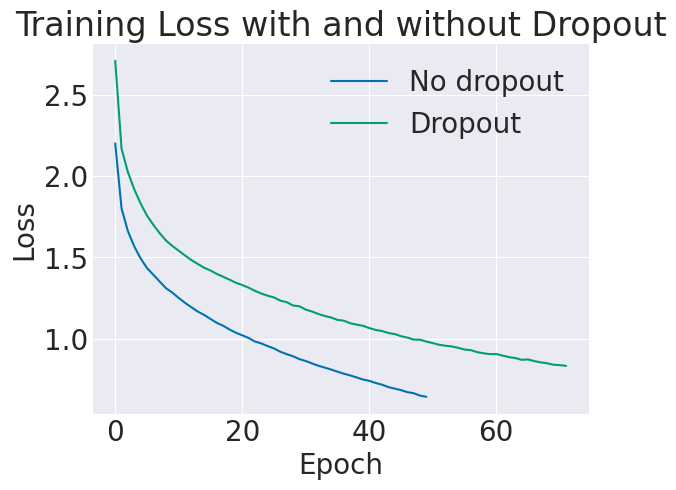

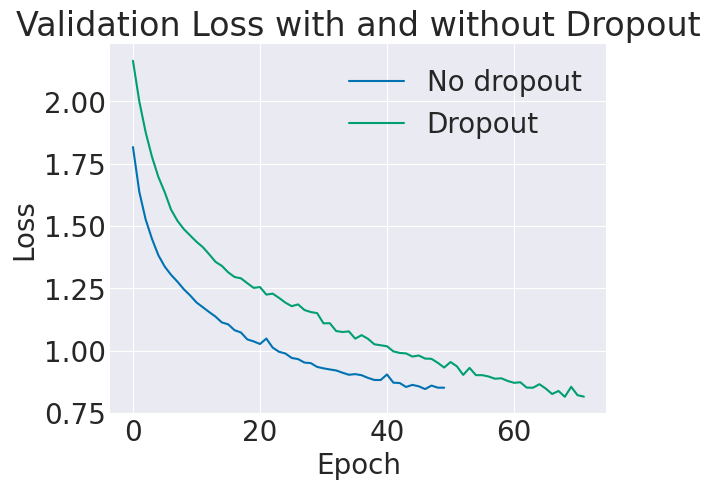

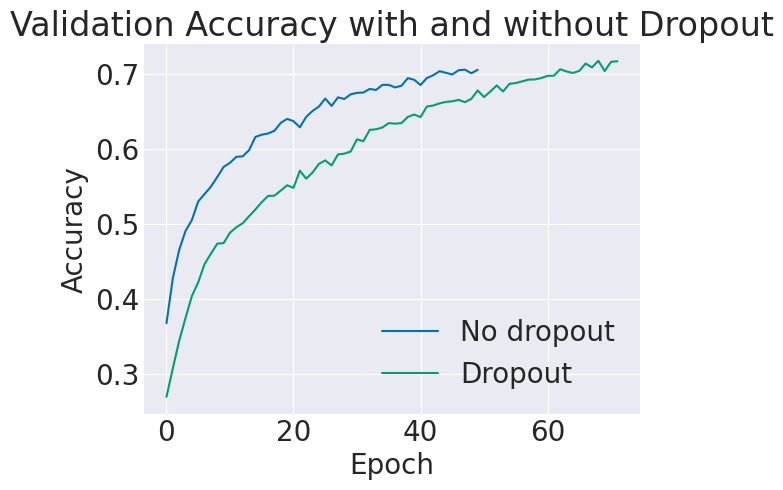

Test accuracy without dropout: 0.6914, Epochs: 50
Test accuracy with dropout: 0.7079, Epochs: 72


In [20]:
def plot_hist_dropout_exp(hist_nodropout, hist_dropout, title, ylabel):
    '''Plots either the training loss history, val loss history, or val acc history for the net trained with and
    without dropout.

    This plotting function is provided to you. Feel free to modify to suit your needs.

    Parameters:
    -----------
    hist_nodropout: array-like. len(hist_nodropout)=E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the net trained without dropout.
    hist_dropout: array-like. len(hist_dropout)=E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the net trained with dropout.
    title: str.
        A useful title.
    ylabel: str.
        A useful y label.
    '''
    plt.plot(hist_nodropout, label='No dropout')
    plt.plot(hist_dropout, label='Dropout')
    plt.legend()
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.show()

# Plot training loss history
plot_hist_dropout_exp(nodropout_results[2], dropout_results[2], 'Training Loss with and without Dropout', 'Loss')

# Plot validation loss history
plot_hist_dropout_exp(nodropout_results[3], dropout_results[3], 'Validation Loss with and without Dropout', 'Loss')

# Plot validation accuracy history
plot_hist_dropout_exp(nodropout_results[4], dropout_results[4], 'Validation Accuracy with and without Dropout', 'Accuracy')

# Print test accuracy for each network along with the number of actual training epochs
print(f'Test accuracy without dropout: {nodropout_results[0].numpy():.4f}, Epochs: {nodropout_results[1]}')
print(f'Test accuracy with dropout: {dropout_results[0].numpy():.4f}, Epochs: {dropout_results[1]}')


### 7c. Questions

**Question 7:** What effect does the dropout have on the training and validation loss? What accounts the difference you observe? Please be specific.

**Question 8:** What effect does the dropout have on the CIFAR10 test accuracy you achieved?

**Question 9:** How does the test accuracy achieved with VGG8 (with and without dropout) compare to the best performing VGG6 network?

**Answer 7:** Dropout has higher training loss, even continuing for more epochs. It initially also has higher validation loss, but after continuing past where non-dropout stopped, it eventually gets lower. This is because dropout forces the network to not overfit or rely on specific neurons, instead trying to generalize better for higher accuracy on test data by pruning random neurons. As such, the initial loss ends up being higher for dropout, and it takes longer to converge.

**Answer 8:** Dropout achieved 0.7079 in 72 epochs, which is marginally higher than the final accuracy without dropout, 0.6914 in 50 epochs.

**Answer 9:** Dropout is around ~1% lower than the best VGG6 network (0.7174), but just barely. Without, it is around ~2% worse.

### 7d. Add support for AdamW optimizer

Another way to combat overfitting is more "traditional" regularization. But Adam may no longer be best choice when introducing this into training.

In the `compile` method of `DeepNetwork`, add support for the AdamW optimizer (suggested string to select: `'adamw'`). When you create the AdamW optimizer object, specify the learning rate AND set the `weight_decay` keyword argument to the network's regularization strength. Since we are using the Keras built-in optimizer, this should be a one-liner.

### 7e. Regularization and choice of optimizer

In the cell below, train VGG8 repeatedly with the following combinations of optimizer and regularization choices (*4 nets trained total*):

**(Reg strength, optimizer):** `(0.6, Adam), (0.6, AdamW), (0.06, Adam), (0.0, Adam)`

Do **not** use dropout in the conv blocks. Train with a patience of `4`. Use He initialization.

After training each net, store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).
4. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the network to help prevent the memory used from growing.

In [26]:
# Define the combinations of regularization strength and optimizer
combinations = [
    (0.6, 'adam'),
    (0.6, 'adamw'),
    (0.06, 'adam'),
    (0.0, 'adam')
]

results = []

# Train
for reg_strength, optimizer_name in combinations:
    print(f"\nTraining VGG8 with reg_strength={reg_strength} and optimizer={optimizer_name}")
    
    # Clear session and set seeds
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    
    # Create and compile model
    model = VGG8(C=10, input_feats_shape=(32, 32, 3), wt_init='he', reg=reg_strength)
    model.compile(optimizer=optimizer_name, lr=1e-5)
    
    # Train model
    train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(
        x_train, y_train, 
        x_val, y_val,
        patience=4,
        verbose=True
    )
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test)

    # Store results
    results.append({
        'reg_strength': reg_strength,
        'optimizer': optimizer_name,
        'test_acc': test_acc,
        'epochs': epochs,
        'train_loss_hist': train_loss_hist,
        'val_loss_hist': val_loss_hist,
        'val_acc_hist': val_acc_hist
    })

# Print results
for result in results:
    print(f"Reg Strength: {result['reg_strength']}, Optimizer: {result['optimizer']}")
    print(f"Test Accuracy: {result['test_acc']}")
    print(f"Epochs: {result['epochs']}")
    print(f"Train Loss History: {result['train_loss_hist']}")
    print(f"Validation Loss History: {result['val_loss_hist']}")
    print(f"Validation Accuracy History: {result['val_acc_hist']}")
    print("\n")


Training VGG8 with reg_strength=0.6 and optimizer=adam
---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(Flatten) shape: [1, 4096]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv_0) shape: [1, 8, 8, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv_1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv_0) shape: [1, 16, 16, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool) shape: [1, 16, 16, 64]
	Conv2D layer output(ConvBlock1/conv_1) shape: [1, 32, 32, 64]
	Conv2D layer output(ConvBlock1/conv_0) shape: [1, 32, 32, 64]
-----------------------------------

In [14]:

results = {
    'adam_reg': {
        'reg_strength': 0.6,
        'optimizer': 'adam',
        'test_acc': 0.10016025602817535,
        'epochs': 321,
        'train_loss_hist': [np.float32(786.49097), np.float32(667.70233), np.float32(568.7582), np.float32(486.01364), np.float32(416.4988), np.float32(357.87112), np.float32(308.2794), np.float32(266.24832), np.float32(230.57094), np.float32(200.26328), np.float32(174.49907), np.float32(152.58514), np.float32(133.93773), np.float32(118.05362), np.float32(104.51649), np.float32(92.96289), np.float32(83.08849), np.float32(74.629906), np.float32(67.35218), np.float32(61.073193), np.float32(55.664745), np.float32(51.00201), np.float32(46.966232), np.float32(43.460964), np.float32(40.406754), np.float32(37.737064), np.float32(35.39589), np.float32(33.335854), np.float32(31.516851), np.float32(29.904724), np.float32(28.47041), np.float32(27.18907), np.float32(26.039467), np.float32(25.003426), np.float32(24.06533), np.float32(23.211794), np.float32(22.431343), np.float32(21.714123), np.float32(21.05168), np.float32(20.436804), np.float32(19.863312), np.float32(19.325943), np.float32(18.820177), np.float32(18.342188), np.float32(17.888708), np.float32(17.456942), np.float32(17.044508), np.float32(16.64938), np.float32(16.269835), np.float32(15.904383), np.float32(15.551742), np.float32(15.210804), np.float32(14.88064), np.float32(14.560426), np.float32(14.249462), np.float32(13.947135), np.float32(13.652925), np.float32(13.366385), np.float32(13.087128), np.float32(12.814782), np.float32(12.549047), np.float32(12.289652), np.float32(12.03635), np.float32(11.788921), np.float32(11.547161), np.float32(11.310913), np.float32(11.080024), np.float32(10.85435), np.float32(10.633767), np.float32(10.418139), np.float32(10.207364), np.float32(10.001335), np.float32(9.799951), np.float32(9.603128), np.float32(9.410766), np.float32(9.22279), np.float32(9.039118), np.float32(8.859656), np.float32(8.684335), np.float32(8.51306), np.float32(8.345759), np.float32(8.182361), np.float32(8.022782), np.float32(7.8669586), np.float32(7.7148166), np.float32(7.5662885), np.float32(7.42131), np.float32(7.279805), np.float32(7.141696), np.float32(7.006908), np.float32(6.8753757), np.float32(6.747034), np.float32(6.621819), np.float32(6.499664), np.float32(6.3805056), np.float32(6.264292), np.float32(6.150958), np.float32(6.0404506), np.float32(5.932716), np.float32(5.827688), np.float32(5.7253113), np.float32(5.6255417), np.float32(5.528331), np.float32(5.4336195), np.float32(5.3413444), np.float32(5.2514524), np.float32(5.163892), np.float32(5.0786033), np.float32(4.9955277), np.float32(4.914621), np.float32(4.8358364), np.float32(4.759129), np.float32(4.6844425), np.float32(4.6117477), np.float32(4.540997), np.float32(4.472148), np.float32(4.405165), np.float32(4.3400126), np.float32(4.2766476), np.float32(4.2150316), np.float32(4.1551266), np.float32(4.096894), np.float32(4.0403), np.float32(3.9853017), np.float32(3.9318597), np.float32(3.879944), np.float32(3.8295197), np.float32(3.7805498), np.float32(3.7329996), np.float32(3.6868377), np.float32(3.6420343), np.float32(3.5985537), np.float32(3.5563667), np.float32(3.5154455), np.float32(3.4757605), np.float32(3.4372733), np.float32(3.3999655), np.float32(3.3637998), np.float32(3.3287466), np.float32(3.2947702), np.float32(3.2618456), np.float32(3.2299385), np.float32(3.1990259), np.float32(3.1690712), np.float32(3.1400537), np.float32(3.1119497), np.float32(3.0847285), np.float32(3.058367), np.float32(3.032849), np.float32(3.0081482), np.float32(2.9842482), np.float32(2.961129), np.float32(2.9387672), np.float32(2.9171402), np.float32(2.8962324), np.float32(2.8760195), np.float32(2.8564868), np.float32(2.8376157), np.float32(2.81939), np.float32(2.8017921), np.float32(2.7848024), np.float32(2.768408), np.float32(2.7525885), np.float32(2.7373366), np.float32(2.7226355), np.float32(2.7084692), np.float32(2.6948225), np.float32(2.6816766), np.float32(2.6690187), np.float32(2.6568332), np.float32(2.6451027), np.float32(2.6338134), np.float32(2.622946), np.float32(2.6124804), np.float32(2.602404), np.float32(2.5927024), np.float32(2.5833514), np.float32(2.5743372), np.float32(2.5656393), np.float32(2.557249), np.float32(2.5491476), np.float32(2.5413237), np.float32(2.5337677), np.float32(2.5264685), np.float32(2.5194185), np.float32(2.5126073), np.float32(2.5060213), np.float32(2.4996564), np.float32(2.4935002), np.float32(2.487553), np.float32(2.481797), np.float32(2.4762352), np.float32(2.4708521), np.float32(2.465644), np.float32(2.4605997), np.float32(2.455715), np.float32(2.4509835), np.float32(2.4463937), np.float32(2.4419432), np.float32(2.437621), np.float32(2.4334276), np.float32(2.4293542), np.float32(2.425396), np.float32(2.4215503), np.float32(2.417811), np.float32(2.4141743), np.float32(2.4106445), np.float32(2.407213), np.float32(2.4038813), np.float32(2.400649), np.float32(2.3975105), np.float32(2.394464), np.float32(2.39151), np.float32(2.3886433), np.float32(2.385862), np.float32(2.3831618), np.float32(2.3805406), np.float32(2.3779962), np.float32(2.375523), np.float32(2.373121), np.float32(2.3707838), np.float32(2.368509), np.float32(2.3662941), np.float32(2.3641348), np.float32(2.362029), np.float32(2.3599749), np.float32(2.357971), np.float32(2.356014), np.float32(2.3541014), np.float32(2.3522353), np.float32(2.350412), np.float32(2.3486283), np.float32(2.3468878), np.float32(2.3451884), np.float32(2.343529), np.float32(2.3419113), np.float32(2.3403356), np.float32(2.3387983), np.float32(2.3373008), np.float32(2.335847), np.float32(2.3344285), np.float32(2.3330526), np.float32(2.3317156), np.float32(2.3304179), np.float32(2.3291602), np.float32(2.3279383), np.float32(2.3267581), np.float32(2.3256156), np.float32(2.3245096), np.float32(2.3234422), np.float32(2.322411), np.float32(2.3214166), np.float32(2.3204577), np.float32(2.3195345), np.float32(2.318646), np.float32(2.3177888), np.float32(2.3169677), np.float32(2.3161764), np.float32(2.315421), np.float32(2.3146918), np.float32(2.313997), np.float32(2.3133316), np.float32(2.3126948), np.float32(2.3120883), np.float32(2.3115106), np.float32(2.3109624), np.float32(2.3104403), np.float32(2.3099449), np.float32(2.3094764), np.float32(2.3090317), np.float32(2.3086123), np.float32(2.3082144), np.float32(2.3078382), np.float32(2.3074815), np.float32(2.3071425), np.float32(2.3068223), np.float32(2.3065145), np.float32(2.3062224), np.float32(2.3059428), np.float32(2.3056777), np.float32(2.305425), np.float32(2.305185), np.float32(2.3049579), np.float32(2.3047426), np.float32(2.304539), np.float32(2.3043482), np.float32(2.3041697), np.float32(2.3040032), np.float32(2.303849), np.float32(2.3037035), np.float32(2.3035707), np.float32(2.3034487), np.float32(2.3033369), np.float32(2.3032358), np.float32(2.3031445), np.float32(2.303061), np.float32(2.3029892), np.float32(2.3029232), np.float32(2.3028662), np.float32(2.3028147), np.float32(2.3027716), np.float32(2.3027322), np.float32(2.3026993), np.float32(2.302671), np.float32(2.3026483), np.float32(2.3026288), np.float32(2.3026142), np.float32(2.302601), np.float32(2.3025937), np.float32(2.3025854), np.float32(2.3025825), np.float32(2.3025804), np.float32(2.3025765), np.float32(2.3025773), np.float32(2.3025765), np.float32(2.302576), np.float32(2.3025765), np.float32(2.302576), np.float32(2.3025758), np.float32(2.3025763), np.float32(2.3025765)],
        'val_loss_hist': [np.float32(723.212), np.float32(615.0483), np.float32(524.78876), np.float32(449.1239), np.float32(385.4168), np.float32(331.6055), np.float32(286.0264), np.float32(247.36664), np.float32(214.53435), np.float32(186.63489), np.float32(162.90958), np.float32(142.72305), np.float32(125.540375), np.float32(110.89964), np.float32(98.412704), np.float32(87.750854), np.float32(78.6291), np.float32(70.80017), np.float32(64.04875), np.float32(58.2266), np.float32(53.213528), np.float32(48.882954), np.float32(45.127647), np.float32(41.860603), np.float32(39.009327), np.float32(36.512913), np.float32(34.31992), np.float32(32.386894), np.float32(30.676867), np.float32(29.158354), np.float32(27.804552), np.float32(26.592535), np.float32(25.50268), np.float32(24.518148), np.float32(23.624508), np.float32(22.809383), np.float32(22.062151), np.float32(21.3737), np.float32(20.736214), np.float32(20.143032), np.float32(19.58846), np.float32(19.067638), np.float32(18.576385), np.float32(18.111193), np.float32(17.669025), np.float32(17.247316), np.float32(16.843868), np.float32(16.456821), np.float32(16.084566), np.float32(15.725742), np.float32(15.379135), np.float32(15.043748), np.float32(14.718699), np.float32(14.403228), np.float32(14.09669), np.float32(13.798511), np.float32(13.50822), np.float32(13.225396), np.float32(12.949657), np.float32(12.680671), np.float32(12.418162), np.float32(12.161864), np.float32(11.911536), np.float32(11.666979), np.float32(11.42801), np.float32(11.194471), np.float32(10.96622), np.float32(10.743118), np.float32(10.525041), np.float32(10.311864), np.float32(10.10349), np.float32(9.899804), np.float32(9.700717), np.float32(9.50615), np.float32(9.315996), np.float32(9.130195), np.float32(8.948649), np.float32(8.771273), np.float32(8.597997), np.float32(8.428726), np.float32(8.263392), np.float32(8.101923), np.float32(7.944239), np.float32(7.790272), np.float32(7.639955), np.float32(7.493214), np.float32(7.349994), np.float32(7.2102027), np.float32(7.073771), np.float32(6.940629), np.float32(6.8107057), np.float32(6.6839414), np.float32(6.5602717), np.float32(6.439628), np.float32(6.3219585), np.float32(6.2071986), np.float32(6.095288), np.float32(5.986179), np.float32(5.879813), np.float32(5.776125), np.float32(5.675062), np.float32(5.576586), np.float32(5.4806376), np.float32(5.3871555), np.float32(5.2960844), np.float32(5.2073736), np.float32(5.1209593), np.float32(5.036791), np.float32(4.954809), np.float32(4.874974), np.float32(4.797237), np.float32(4.7215524), np.float32(4.6478686), np.float32(4.576157), np.float32(4.5063667), np.float32(4.4384604), np.float32(4.3723984), np.float32(4.308151), np.float32(4.2456703), np.float32(4.184917), np.float32(4.1258564), np.float32(4.0684543), np.float32(4.0126653), np.float32(3.9584527), np.float32(3.9057832), np.float32(3.8546193), np.float32(3.80493), np.float32(3.7566767), np.float32(3.7098296), np.float32(3.664354), np.float32(3.6202192), np.float32(3.577392), np.float32(3.535844), np.float32(3.4955494), np.float32(3.4564703), np.float32(3.4185796), np.float32(3.381847), np.float32(3.346245), np.float32(3.3117366), np.float32(3.2782917), np.float32(3.2458837), np.float32(3.2144794), np.float32(3.184052), np.float32(3.1545718), np.float32(3.126015), np.float32(3.0983582), np.float32(3.071573), np.float32(3.045638), np.float32(3.0205336), np.float32(2.9962358), np.float32(2.972731), np.float32(2.9499955), np.float32(2.928005), np.float32(2.906742), np.float32(2.8861854), np.float32(2.8663173), np.float32(2.847119), np.float32(2.828573), np.float32(2.8106663), np.float32(2.793376), np.float32(2.7766871), np.float32(2.7605846), np.float32(2.7450502), np.float32(2.730076), np.float32(2.7156475), np.float32(2.7017434), np.float32(2.688351), np.float32(2.6754522), np.float32(2.6630342), np.float32(2.6510777), np.float32(2.6395717), np.float32(2.628497), np.float32(2.6178355), np.float32(2.607567), np.float32(2.5976818), np.float32(2.5881593), np.float32(2.5789793), np.float32(2.570127), np.float32(2.5615845), np.float32(2.553342), np.float32(2.5453813), np.float32(2.537693), np.float32(2.5302675), np.float32(2.5230963), np.float32(2.5161674), np.float32(2.5094693), np.float32(2.502994), np.float32(2.4967372), np.float32(2.490686), np.float32(2.4848359), np.float32(2.4791791), np.float32(2.4737084), np.float32(2.468414), np.float32(2.4632888), np.float32(2.4583266), np.float32(2.4535193), np.float32(2.4488602), np.float32(2.4443407), np.float32(2.4399562), np.float32(2.435699), np.float32(2.4315672), np.float32(2.427553), np.float32(2.4236505), np.float32(2.419859), np.float32(2.4161716), np.float32(2.4125896), np.float32(2.4091094), np.float32(2.4057286), np.float32(2.4024477), np.float32(2.3992608), np.float32(2.396169), np.float32(2.3931692), np.float32(2.3902597), np.float32(2.3874354), np.float32(2.3846946), np.float32(2.382036), np.float32(2.379454), np.float32(2.3769462), np.float32(2.374509), np.float32(2.3721387), np.float32(2.3698344), np.float32(2.3675892), np.float32(2.3654034), np.float32(2.363272), np.float32(2.3611927), np.float32(2.359163), np.float32(2.3571818), np.float32(2.3552485), np.float32(2.3533595), np.float32(2.3515148), np.float32(2.3497117), np.float32(2.3479502), np.float32(2.3462315), np.float32(2.3445508), np.float32(2.3429127), np.float32(2.3413155), np.float32(2.3397593), np.float32(2.3382413), np.float32(2.336766), np.float32(2.3353298), np.float32(2.3339329), np.float32(2.3325772), np.float32(2.331259), np.float32(2.3299816), np.float32(2.328743), np.float32(2.327541), np.float32(2.326381), np.float32(2.3252568), np.float32(2.3241699), np.float32(2.3231204), np.float32(2.322108), np.float32(2.3211312), np.float32(2.3201904), np.float32(2.3192842), np.float32(2.3184125), np.float32(2.3175728), np.float32(2.316767), np.float32(2.3159935), np.float32(2.3152516), np.float32(2.314539), np.float32(2.3138587), np.float32(2.3132079), np.float32(2.3125868), np.float32(2.3119955), np.float32(2.3114316), np.float32(2.3108969), np.float32(2.3103893), np.float32(2.3099067), np.float32(2.3094509), np.float32(2.3090193), np.float32(2.3086102), np.float32(2.3082237), np.float32(2.307858), np.float32(2.30751), np.float32(2.3071804), np.float32(2.3068664), np.float32(2.3065662), np.float32(2.3062809), np.float32(2.3060086), np.float32(2.30575), np.float32(2.3055034), np.float32(2.3052695), np.float32(2.305049), np.float32(2.304839), np.float32(2.3046422), np.float32(2.3044584), np.float32(2.3042858), np.float32(2.3041239), np.float32(2.3039753), np.float32(2.3038356), np.float32(2.303709), np.float32(2.303591), np.float32(2.3034844), np.float32(2.3033886), np.float32(2.3033016), np.float32(2.3032243), np.float32(2.3031545), np.float32(2.303094), np.float32(2.303039), np.float32(2.3029916), np.float32(2.3029516), np.float32(2.302915), np.float32(2.3028853), np.float32(2.3028603), np.float32(2.3028386), np.float32(2.3028216), np.float32(2.3028076), np.float32(2.3027978), np.float32(2.30279), np.float32(2.3027837), np.float32(2.3027809), np.float32(2.3027792), np.float32(2.3027775), np.float32(2.3027775), np.float32(2.3027775), np.float32(2.302777), np.float32(2.302777), np.float32(2.302777), np.float32(2.302778), np.float32(2.3027775), np.float32(2.3027775)],
        'val_acc_hist': [np.float32(0.2674279), np.float32(0.30809295), np.float32(0.33153045), np.float32(0.3309295), np.float32(0.32932693), np.float32(0.32271636), np.float32(0.31810898), np.float32(0.30348557), np.float32(0.30048078), np.float32(0.28585738), np.float32(0.27684295), np.float32(0.27043268), np.float32(0.2558093), np.float32(0.24479167), np.float32(0.24278846), np.float32(0.2373798), np.float32(0.21794872), np.float32(0.20132211), np.float32(0.16426282), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244), np.float32(0.095152244)]
    },
    'adam_low_reg': {
        'reg_strength': 0.06,
        'optimizer': 'adam',
        'test_acc': 0.5535857081413269,
        'epochs': 257,
        'train_loss_hist': [np.float32(82.86492), np.float32(74.08772), np.float32(66.55836), np.float32(60.03063), np.float32(54.35404), np.float32(49.399033), np.float32(45.070717), np.float32(41.27272), np.float32(37.933853), np.float32(34.99469), np.float32(32.382618), np.float32(30.06032), np.float32(27.989967), np.float32(26.141798), np.float32(24.490376), np.float32(22.997068), np.float32(21.641441), np.float32(20.418875), np.float32(19.311016), np.float32(18.30358), np.float32(17.395638), np.float32(16.55727), np.float32(15.793435), np.float32(15.089932), np.float32(14.43772), np.float32(13.841217), np.float32(13.286628), np.float32(12.769104), np.float32(12.287933), np.float32(11.839486), np.float32(11.421555), np.float32(11.0379095), np.float32(10.673526), np.float32(10.33764), np.float32(10.02306), np.float32(9.726602), np.float32(9.448414), np.float32(9.188458), np.float32(8.944233), np.float32(8.710234), np.float32(8.491734), np.float32(8.28653), np.float32(8.089424), np.float32(7.9033704), np.float32(7.7298326), np.float32(7.560829), np.float32(7.401024), np.float32(7.2465167), np.float32(7.100531), np.float32(6.9603367), np.float32(6.825401), np.float32(6.696672), np.float32(6.5709653), np.float32(6.4556255), np.float32(6.3397646), np.float32(6.226643), np.float32(6.1224422), np.float32(6.0177627), np.float32(5.9196963), np.float32(5.8233047), np.float32(5.734634), np.float32(5.6410756), np.float32(5.556386), np.float32(5.4720936), np.float32(5.3958974), np.float32(5.3137226), np.float32(5.2385526), np.float32(5.1636662), np.float32(5.088652), np.float32(5.019508), np.float32(4.951439), np.float32(4.8857837), np.float32(4.821918), np.float32(4.7563033), np.float32(4.6958804), np.float32(4.636295), np.float32(4.5810375), np.float32(4.5232368), np.float32(4.468269), np.float32(4.412726), np.float32(4.360367), np.float32(4.310428), np.float32(4.26307), np.float32(4.218845), np.float32(4.1644726), np.float32(4.120877), np.float32(4.0790405), np.float32(4.0326047), np.float32(3.9882035), np.float32(3.9488883), np.float32(3.9051504), np.float32(3.8657568), np.float32(3.8270721), np.float32(3.7897377), np.float32(3.7521646), np.float32(3.7137651), np.float32(3.6799912), np.float32(3.642018), np.float32(3.611068), np.float32(3.5729315), np.float32(3.544205), np.float32(3.5094717), np.float32(3.4812505), np.float32(3.4501803), np.float32(3.4187162), np.float32(3.3945222), np.float32(3.364422), np.float32(3.3349962), np.float32(3.3082268), np.float32(3.2826414), np.float32(3.255503), np.float32(3.2314415), np.float32(3.211287), np.float32(3.1822546), np.float32(3.1613512), np.float32(3.137187), np.float32(3.1115105), np.float32(3.092334), np.float32(3.0718424), np.float32(3.0497422), np.float32(3.0285075), np.float32(3.0048056), np.float32(2.9884741), np.float32(2.9686136), np.float32(2.9474447), np.float32(2.9284377), np.float32(2.9100442), np.float32(2.8932364), np.float32(2.877952), np.float32(2.8569586), np.float32(2.8413217), np.float32(2.8251457), np.float32(2.807431), np.float32(2.7932913), np.float32(2.7795599), np.float32(2.7611601), np.float32(2.7475243), np.float32(2.7307775), np.float32(2.717346), np.float32(2.7045202), np.float32(2.6908493), np.float32(2.6781683), np.float32(2.6592662), np.float32(2.6482399), np.float32(2.6373527), np.float32(2.6244154), np.float32(2.6150925), np.float32(2.6016402), np.float32(2.5867612), np.float32(2.5752897), np.float32(2.5644512), np.float32(2.5522106), np.float32(2.5460284), np.float32(2.531384), np.float32(2.5231643), np.float32(2.5110915), np.float32(2.5008347), np.float32(2.4912488), np.float32(2.482665), np.float32(2.472314), np.float32(2.461418), np.float32(2.4521005), np.float32(2.4443352), np.float32(2.4335296), np.float32(2.4260032), np.float32(2.418491), np.float32(2.4087145), np.float32(2.4002833), np.float32(2.3939478), np.float32(2.3858278), np.float32(2.3790529), np.float32(2.3688948), np.float32(2.3603303), np.float32(2.3550959), np.float32(2.3466964), np.float32(2.3418105), np.float32(2.3328187), np.float32(2.3290298), np.float32(2.3177679), np.float32(2.3125463), np.float32(2.3055696), np.float32(2.2978816), np.float32(2.2941413), np.float32(2.2871263), np.float32(2.2807887), np.float32(2.2758045), np.float32(2.2698095), np.float32(2.2611756), np.float32(2.2580836), np.float32(2.2512872), np.float32(2.2481687), np.float32(2.2414773), np.float32(2.2345977), np.float32(2.232164), np.float32(2.2248986), np.float32(2.2211907), np.float32(2.2171063), np.float32(2.2114992), np.float32(2.2084734), np.float32(2.202669), np.float32(2.1990082), np.float32(2.190677), np.float32(2.186645), np.float32(2.183995), np.float32(2.178491), np.float32(2.1782718), np.float32(2.1719382), np.float32(2.1677046), np.float32(2.1622965), np.float32(2.1589484), np.float32(2.1553519), np.float32(2.150786), np.float32(2.146844), np.float32(2.1449232), np.float32(2.1389945), np.float32(2.1354134), np.float32(2.1338556), np.float32(2.1295722), np.float32(2.1263337), np.float32(2.1219072), np.float32(2.1205406), np.float32(2.1147585), np.float32(2.1122186), np.float32(2.1101031), np.float32(2.1055427), np.float32(2.104226), np.float32(2.0994308), np.float32(2.0967772), np.float32(2.0899367), np.float32(2.0904534), np.float32(2.0866623), np.float32(2.0856512), np.float32(2.0817542), np.float32(2.0781379), np.float32(2.0777686), np.float32(2.0744958), np.float32(2.0713165), np.float32(2.0698583), np.float32(2.0660734), np.float32(2.0634577), np.float32(2.0601428), np.float32(2.0609844), np.float32(2.0549707), np.float32(2.052481), np.float32(2.051633), np.float32(2.048172), np.float32(2.048312), np.float32(2.0428765), np.float32(2.0450647), np.float32(2.040023), np.float32(2.0376723), np.float32(2.0368812), np.float32(2.035981), np.float32(2.032714), np.float32(2.0311897), np.float32(2.0262804), np.float32(2.0242083)],
        'val_loss_hist': [np.float32(78.13729), np.float32(70.05501), np.float32(63.054783), np.float32(56.987713), np.float32(51.68448), np.float32(47.06305), np.float32(43.014027), np.float32(39.474514), np.float32(36.345627), np.float32(33.576496), np.float32(31.117456), np.float32(28.92705), np.float32(26.977411), np.float32(25.234802), np.float32(23.668266), np.float32(22.25763), np.float32(20.961906), np.float32(19.794426), np.float32(18.741886), np.float32(17.782381), np.float32(16.918415), np.float32(16.130672), np.float32(15.3901415), np.float32(14.706884), np.float32(14.089994), np.float32(13.505811), np.float32(12.9732275), np.float32(12.478103), np.float32(12.012492), np.float32(11.573978), np.float32(11.182405), np.float32(10.809477), np.float32(10.459828), np.float32(10.137618), np.float32(9.837867), np.float32(9.5451765), np.float32(9.273067), np.float32(9.015011), np.float32(8.776821), np.float32(8.555696), np.float32(8.3422785), np.float32(8.138296), np.float32(7.967594), np.float32(7.7948155), np.float32(7.613038), np.float32(7.4414687), np.float32(7.283219), np.float32(7.1417065), np.float32(6.995056), np.float32(6.858441), np.float32(6.7224035), np.float32(6.5912185), np.float32(6.466359), np.float32(6.35548), np.float32(6.2448926), np.float32(6.135269), np.float32(6.0281234), np.float32(5.9300933), np.float32(5.849283), np.float32(5.73639), np.float32(5.640668), np.float32(5.5609937), np.float32(5.480838), np.float32(5.3919587), np.float32(5.322083), np.float32(5.235911), np.float32(5.1567264), np.float32(5.0895057), np.float32(5.0169578), np.float32(4.94565), np.float32(4.8785105), np.float32(4.813227), np.float32(4.763362), np.float32(4.710451), np.float32(4.6245), np.float32(4.5800285), np.float32(4.5115876), np.float32(4.450789), np.float32(4.4033256), np.float32(4.3487363), np.float32(4.3002186), np.float32(4.264948), np.float32(4.2438655), np.float32(4.1483016), np.float32(4.1059732), np.float32(4.059347), np.float32(4.0208807), np.float32(3.9704766), np.float32(3.947638), np.float32(3.885542), np.float32(3.8594685), np.float32(3.808059), np.float32(3.7688909), np.float32(3.7368977), np.float32(3.6929054), np.float32(3.6571832), np.float32(3.62747), np.float32(3.5839076), np.float32(3.5548048), np.float32(3.5285668), np.float32(3.4892201), np.float32(3.4637733), np.float32(3.4451208), np.float32(3.3992064), np.float32(3.3639178), np.float32(3.34425), np.float32(3.3101673), np.float32(3.2800977), np.float32(3.312895), np.float32(3.2437017), np.float32(3.204042), np.float32(3.1958761), np.float32(3.1590152), np.float32(3.128351), np.float32(3.1110582), np.float32(3.0865602), np.float32(3.069901), np.float32(3.0441868), np.float32(3.0197732), np.float32(3.0121403), np.float32(2.9861073), np.float32(2.9635234), np.float32(2.9355595), np.float32(2.9166753), np.float32(2.9045415), np.float32(2.8818586), np.float32(2.8693707), np.float32(2.8444421), np.float32(2.8362126), np.float32(2.8150861), np.float32(2.7963638), np.float32(2.7754157), np.float32(2.7647882), np.float32(2.7454479), np.float32(2.7312288), np.float32(2.714465), np.float32(2.7046618), np.float32(2.690987), np.float32(2.674016), np.float32(2.654752), np.float32(2.6483176), np.float32(2.6363444), np.float32(2.61482), np.float32(2.6087189), np.float32(2.6006806), np.float32(2.5786028), np.float32(2.5670052), np.float32(2.5599854), np.float32(2.5396907), np.float32(2.5366092), np.float32(2.5477936), np.float32(2.5150058), np.float32(2.5005739), np.float32(2.4949114), np.float32(2.5143323), np.float32(2.469409), np.float32(2.4632638), np.float32(2.4540672), np.float32(2.43686), np.float32(2.4418364), np.float32(2.4298162), np.float32(2.410569), np.float32(2.4011738), np.float32(2.391589), np.float32(2.3827329), np.float32(2.3758736), np.float32(2.366042), np.float32(2.3639653), np.float32(2.3631222), np.float32(2.3434236), np.float32(2.3462071), np.float32(2.3393679), np.float32(2.3294306), np.float32(2.3130362), np.float32(2.3190846), np.float32(2.311959), np.float32(2.29663), np.float32(2.287503), np.float32(2.2804453), np.float32(2.2699637), np.float32(2.2671974), np.float32(2.2723253), np.float32(2.254812), np.float32(2.2560046), np.float32(2.2435164), np.float32(2.2363603), np.float32(2.2462125), np.float32(2.2274218), np.float32(2.216537), np.float32(2.2181513), np.float32(2.206414), np.float32(2.2026527), np.float32(2.1958451), np.float32(2.1947713), np.float32(2.190902), np.float32(2.1986737), np.float32(2.1745076), np.float32(2.1693928), np.float32(2.1742134), np.float32(2.162516), np.float32(2.1628761), np.float32(2.1655114), np.float32(2.1524174), np.float32(2.1473184), np.float32(2.1482499), np.float32(2.1362565), np.float32(2.1541917), np.float32(2.1342504), np.float32(2.1242821), np.float32(2.123957), np.float32(2.1268425), np.float32(2.1130962), np.float32(2.1143453), np.float32(2.1146052), np.float32(2.1049535), np.float32(2.103963), np.float32(2.1123724), np.float32(2.0918071), np.float32(2.086898), np.float32(2.0860612), np.float32(2.0812223), np.float32(2.0867324), np.float32(2.0736177), np.float32(2.071277), np.float32(2.0693562), np.float32(2.066166), np.float32(2.0786922), np.float32(2.055409), np.float32(2.0555613), np.float32(2.051633), np.float32(2.0507243), np.float32(2.0612333), np.float32(2.0574298), np.float32(2.0444093), np.float32(2.0504339), np.float32(2.035855), np.float32(2.034636), np.float32(2.0285027), np.float32(2.0257149), np.float32(2.02261), np.float32(2.0229404), np.float32(2.0326173), np.float32(2.0208986), np.float32(2.034774), np.float32(2.0117443), np.float32(2.0184047), np.float32(2.0100458), np.float32(2.0178466), np.float32(2.0174391), np.float32(2.0030873), np.float32(2.0102298), np.float32(2.0063417), np.float32(1.9956826), np.float32(1.9942828), np.float32(1.9957886), np.float32(1.9947733), np.float32(2.0065782)],
        'val_acc_hist': [np.float32(0.35016027), np.float32(0.40364584), np.float32(0.4354968), np.float32(0.4523237), np.float32(0.47275642), np.float32(0.49338943), np.float32(0.50340545), np.float32(0.5090144), np.float32(0.51522434), np.float32(0.5186298), np.float32(0.5274439), np.float32(0.5354567), np.float32(0.5270433), np.float32(0.53826123), np.float32(0.53625804), np.float32(0.53946316), np.float32(0.5380609), np.float32(0.5438702), np.float32(0.5448718), np.float32(0.5478766), np.float32(0.54867786), np.float32(0.53846157), np.float32(0.5480769), np.float32(0.5488782), np.float32(0.5448718), np.float32(0.55128205), np.float32(0.5498798), np.float32(0.5526843), np.float32(0.55028045), np.float32(0.5516827), np.float32(0.5508814), np.float32(0.5510817), np.float32(0.5516827), np.float32(0.5478766), np.float32(0.5498798), np.float32(0.55228364), np.float32(0.5506811), np.float32(0.55288464), np.float32(0.552484), np.float32(0.55408657), np.float32(0.5520833), np.float32(0.55428684), np.float32(0.54647434), np.float32(0.5488782), np.float32(0.5520833), np.float32(0.55188304), np.float32(0.5506811), np.float32(0.55328524), np.float32(0.5508814), np.float32(0.5510817), np.float32(0.55188304), np.float32(0.5604968), np.float32(0.55448717), np.float32(0.5526843), np.float32(0.55749196), np.float32(0.5498798), np.float32(0.55388623), np.float32(0.5508814), np.float32(0.55128205), np.float32(0.5534856), np.float32(0.5536859), np.float32(0.55188304), np.float32(0.5520833), np.float32(0.5566907), np.float32(0.5508814), np.float32(0.5498798), np.float32(0.552484), np.float32(0.55388623), np.float32(0.55508816), np.float32(0.55408657), np.float32(0.5514824), np.float32(0.5578926), np.float32(0.5586939), np.float32(0.5478766), np.float32(0.55128205), np.float32(0.55508816), np.float32(0.5578926), np.float32(0.55909455), np.float32(0.5582933), np.float32(0.55388623), np.float32(0.5530849), np.float32(0.5452724), np.float32(0.5458734), np.float32(0.55608976), np.float32(0.55408657), np.float32(0.55428684), np.float32(0.55228364), np.float32(0.556891), np.float32(0.5504808), np.float32(0.5534856), np.float32(0.55408657), np.float32(0.5572917), np.float32(0.5572917), np.float32(0.556891), np.float32(0.5594952), np.float32(0.552484), np.float32(0.5534856), np.float32(0.5592949), np.float32(0.5566907), np.float32(0.55548877), np.float32(0.5602965), np.float32(0.5536859), np.float32(0.5504808), np.float32(0.55649036), np.float32(0.5588942), np.float32(0.5582933), np.float32(0.5598958), np.float32(0.5602965), np.float32(0.53365386), np.float32(0.5500801), np.float32(0.5614984), np.float32(0.5510817), np.float32(0.5556891), np.float32(0.56189907), np.float32(0.5546875), np.float32(0.56290066), np.float32(0.5582933), np.float32(0.5576923), np.float32(0.5572917), np.float32(0.55508816), np.float32(0.5582933), np.float32(0.5586939), np.float32(0.56009614), np.float32(0.56330127), np.float32(0.56169873), np.float32(0.5594952), np.float32(0.55749196), np.float32(0.5594952), np.float32(0.55448717), np.float32(0.5566907), np.float32(0.5586939), np.float32(0.56330127), np.float32(0.556891), np.float32(0.56750804), np.float32(0.5584936), np.float32(0.56229967), np.float32(0.56390226), np.float32(0.56229967), np.float32(0.56390226), np.float32(0.5637019), np.float32(0.5546875), np.float32(0.5588942), np.float32(0.56270033), np.float32(0.5604968), np.float32(0.56290066), np.float32(0.5614984), np.float32(0.56229967), np.float32(0.56330127), np.float32(0.5625), np.float32(0.5602965), np.float32(0.5546875), np.float32(0.5612981), np.float32(0.55649036), np.float32(0.5572917), np.float32(0.5484776), np.float32(0.5598958), np.float32(0.56310093), np.float32(0.5614984), np.float32(0.56229967), np.float32(0.5536859), np.float32(0.56390226), np.float32(0.56270033), np.float32(0.5637019), np.float32(0.56330127), np.float32(0.56390226), np.float32(0.56069714), np.float32(0.55969554), np.float32(0.5588942), np.float32(0.5572917), np.float32(0.5608974), np.float32(0.55528843), np.float32(0.55528843), np.float32(0.56169873), np.float32(0.56109774), np.float32(0.5598958), np.float32(0.56009614), np.float32(0.56209934), np.float32(0.56009614), np.float32(0.56189907), np.float32(0.5612981), np.float32(0.5578926), np.float32(0.55809295), np.float32(0.56270033), np.float32(0.56209934), np.float32(0.56069714), np.float32(0.56310093), np.float32(0.55548877), np.float32(0.5608974), np.float32(0.56169873), np.float32(0.56290066), np.float32(0.56330127), np.float32(0.5592949), np.float32(0.57011217), np.float32(0.5625), np.float32(0.5647035), np.float32(0.56189907), np.float32(0.56390226), np.float32(0.56490386), np.float32(0.55649036), np.float32(0.5556891), np.float32(0.56330127), np.float32(0.5572917), np.float32(0.56310093), np.float32(0.56270033), np.float32(0.5602965), np.float32(0.56209934), np.float32(0.55488783), np.float32(0.5588942), np.float32(0.56490386), np.float32(0.56270033), np.float32(0.5558894), np.float32(0.56189907), np.float32(0.55909455), np.float32(0.5586939), np.float32(0.5614984), np.float32(0.56169873), np.float32(0.5598958), np.float32(0.5614984), np.float32(0.5647035), np.float32(0.56430286), np.float32(0.5655048), np.float32(0.5614984), np.float32(0.56490386), np.float32(0.56330127), np.float32(0.5655048), np.float32(0.56189907), np.float32(0.5586939), np.float32(0.57051283), np.float32(0.5651042), np.float32(0.56690705), np.float32(0.5667067), np.float32(0.5608974), np.float32(0.5612981), np.float32(0.5635016), np.float32(0.56109774), np.float32(0.5667067), np.float32(0.5645032), np.float32(0.5687099), np.float32(0.57271636), np.float32(0.56530446), np.float32(0.5657051), np.float32(0.56310093), np.float32(0.56530446), np.float32(0.5594952), np.float32(0.5657051), np.float32(0.56009614), np.float32(0.5661058), np.float32(0.5588942), np.float32(0.56390226), np.float32(0.5661058), np.float32(0.5673077), np.float32(0.5657051), np.float32(0.56750804), np.float32(0.5657051), np.float32(0.5614984), np.float32(0.56490386), np.float32(0.5612981)]
    },  
    'adam_no_reg': {
        'reg_strength': 0.0,
        'optimizer': 'adam',
        'test_acc': 0.6879006624221802,
        'epochs': 50,
        'train_loss_hist': [np.float32(2.2016902), np.float32(1.8008701), np.float32(1.6619854), np.float32(1.5675132), np.float32(1.4944274), np.float32(1.4349666), np.float32(1.3940402), np.float32(1.3512837), np.float32(1.311372), np.float32(1.2836967), np.float32(1.2504195), np.float32(1.220486), np.float32(1.1939955), np.float32(1.1671834), np.float32(1.14664), np.float32(1.1219941), np.float32(1.0979961), np.float32(1.0801566), np.float32(1.0578911), np.float32(1.0365764), np.float32(1.0207072), np.float32(1.0054017), np.float32(0.9840726), np.float32(0.9711081), np.float32(0.9537113), np.float32(0.94005877), np.float32(0.92052305), np.float32(0.9053705), np.float32(0.8921173), np.float32(0.8752209), np.float32(0.8626137), np.float32(0.84885424), np.float32(0.833476), np.float32(0.8222797), np.float32(0.81168425), np.float32(0.7988192), np.float32(0.78519666), np.float32(0.77436376), np.float32(0.7633901), np.float32(0.7490162), np.float32(0.7413212), np.float32(0.7285643), np.float32(0.7163014), np.float32(0.70332855), np.float32(0.69410783), np.float32(0.68405634), np.float32(0.6726877), np.float32(0.6645265), np.float32(0.6509102), np.float32(0.6425463)],
        'val_loss_hist': [np.float32(1.8180006), np.float32(1.6374881), np.float32(1.5271997), np.float32(1.4507182), np.float32(1.3860244), np.float32(1.3382257), np.float32(1.303911), np.float32(1.2790965), np.float32(1.2495835), np.float32(1.224795), np.float32(1.1973107), np.float32(1.1774334), np.float32(1.1565484), np.float32(1.1374538), np.float32(1.1150786), np.float32(1.1059321), np.float32(1.0852367), np.float32(1.0759159), np.float32(1.0479943), np.float32(1.0400637), np.float32(1.0284498), np.float32(1.0508062), np.float32(1.012785), np.float32(0.99602354), np.float32(0.9893135), np.float32(0.9712778), np.float32(0.9697425), np.float32(0.95448077), np.float32(0.9519577), np.float32(0.9359759), np.float32(0.92958325), np.float32(0.9260426), np.float32(0.92178357), np.float32(0.91307145), np.float32(0.90656906), np.float32(0.90489274), np.float32(0.90256894), np.float32(0.8931009), np.float32(0.88594925), np.float32(0.8824811), np.float32(0.90399754), np.float32(0.872612), np.float32(0.86962825), np.float32(0.85676914), np.float32(0.8667174), np.float32(0.858038), np.float32(0.8485354), np.float32(0.86147857), np.float32(0.8525577), np.float32(0.8563609)],
        'val_acc_hist': [np.float32(0.36758813), np.float32(0.42487982), np.float32(0.463742), np.float32(0.4901843), np.float32(0.50821316), np.float32(0.53205127), np.float32(0.5426683), np.float32(0.54867786), np.float32(0.56490386), np.float32(0.5713141), np.float32(0.57832533), np.float32(0.5889423), np.float32(0.5895433), np.float32(0.5959535), np.float32(0.6161859), np.float32(0.61638623), np.float32(0.6217949), np.float32(0.62259614), np.float32(0.63822114), np.float32(0.6380208), np.float32(0.64082533), np.float32(0.63141024), np.float32(0.64242786), np.float32(0.6494391), np.float32(0.6546474), np.float32(0.6660657), np.float32(0.6578526), np.float32(0.6660657), np.float32(0.66646636), np.float32(0.67127407), np.float32(0.6760817), np.float32(0.6750801), np.float32(0.6822917), np.float32(0.67888623), np.float32(0.68669873), np.float32(0.6838942), np.float32(0.68249196), np.float32(0.6875), np.float32(0.693109), np.float32(0.69491184), np.float32(0.6828926), np.float32(0.6983173), np.float32(0.7005208), np.float32(0.703125), np.float32(0.6973157), np.float32(0.6963141), np.float32(0.7051282), np.float32(0.70292467), np.float32(0.70072114), np.float32(0.7063301)]
    },
    'adamw': {
        'reg_strength': 0.6,
        'optimizer': 'adamw',
        'test_acc': 0.7082331776618958,
        'epochs': 65,
        'train_loss_hist' : [np.float32(2.201687), np.float32(1.8016021), np.float32(1.6622113), np.float32(1.5682896), np.float32(1.4946381), np.float32(1.4352937), np.float32(1.395269), np.float32(1.3531985), np.float32(1.3130195), np.float32(1.2859782), np.float32(1.2537006), np.float32(1.2243501), np.float32(1.1980587), np.float32(1.1718882), np.float32(1.151257), np.float32(1.1279607), np.float32(1.1039745), np.float32(1.086925), np.float32(1.0662824), np.float32(1.0456289), np.float32(1.0310181), np.float32(1.0153117), np.float32(0.9960667), np.float32(0.9835318), np.float32(0.9682494), np.float32(0.95549357), np.float32(0.93729556), np.float32(0.92488384), np.float32(0.9132623), np.float32(0.89600617), np.float32(0.8858011), np.float32(0.87378997), np.float32(0.86005455), np.float32(0.8502807), np.float32(0.8407619), np.float32(0.8283983), np.float32(0.8184353), np.float32(0.8102243), np.float32(0.7993422), np.float32(0.7870055), np.float32(0.7813224), np.float32(0.76964074), np.float32(0.7621774), np.float32(0.7488182), np.float32(0.742961), np.float32(0.7336347), np.float32(0.7249353), np.float32(0.7179999), np.float32(0.7062851), np.float32(0.7014908), np.float32(0.69616514), np.float32(0.68499464), np.float32(0.6783911), np.float32(0.6733715), np.float32(0.66363925), np.float32(0.65501004), np.float32(0.64873976), np.float32(0.64126813), np.float32(0.6345222), np.float32(0.62838995), np.float32(0.6307509), np.float32(0.61708266), np.float32(0.6106525), np.float32(0.6046469), np.float32(0.6001914)],
        'val_loss_hist' : [np.float32(1.8190866), np.float32(1.6403003), np.float32(1.5295185), np.float32(1.4521308), np.float32(1.3868732), np.float32(1.3398775), np.float32(1.3041743), np.float32(1.279929), np.float32(1.2497194), np.float32(1.2250805), np.float32(1.1944915), np.float32(1.1751878), np.float32(1.1548976), np.float32(1.135802), np.float32(1.1123933), np.float32(1.1064783), np.float32(1.0809171), np.float32(1.0764217), np.float32(1.0493379), np.float32(1.0359168), np.float32(1.0231531), np.float32(1.0469112), np.float32(1.0139471), np.float32(0.9924197), np.float32(0.98584896), np.float32(0.9687039), np.float32(0.9619827), np.float32(0.9508458), np.float32(0.94343644), np.float32(0.9303262), np.float32(0.927335), np.float32(0.9219528), np.float32(0.919237), np.float32(0.9090152), np.float32(0.8974761), np.float32(0.8978833), np.float32(0.8924783), np.float32(0.8792172), np.float32(0.87542236), np.float32(0.8729382), np.float32(0.8893303), np.float32(0.85861266), np.float32(0.8634131), np.float32(0.848773), np.float32(0.8545299), np.float32(0.84637207), np.float32(0.83569217), np.float32(0.8505019), np.float32(0.8332744), np.float32(0.836324), np.float32(0.8175113), np.float32(0.823887), np.float32(0.81569713), np.float32(0.8076851), np.float32(0.79966277), np.float32(0.80608594), np.float32(0.80626476), np.float32(0.79511166), np.float32(0.78695303), np.float32(0.7849842), np.float32(0.78669256), np.float32(0.78074116), np.float32(0.7821723), np.float32(0.78085196), np.float32(0.7954108)],
        'val_acc_hist' : [np.float32(0.36578527), np.float32(0.42628205), np.float32(0.46394232), np.float32(0.49198717), np.float32(0.5078125), np.float32(0.52944714), np.float32(0.5448718), np.float32(0.54867786), np.float32(0.5663061), np.float32(0.5715144), np.float32(0.588141), np.float32(0.5885417), np.float32(0.5901442), np.float32(0.60016024), np.float32(0.6155849), np.float32(0.61798877), np.float32(0.62359774), np.float32(0.62459934), np.float32(0.635016), np.float32(0.64242786), np.float32(0.63882214), np.float32(0.6340144), np.float32(0.64403045), np.float32(0.6542468), np.float32(0.65705127), np.float32(0.6686699), np.float32(0.66326123), np.float32(0.67107373), np.float32(0.6758814), np.float32(0.6776843), np.float32(0.6776843), np.float32(0.68209136), np.float32(0.68469554), np.float32(0.67888623), np.float32(0.68890226), np.float32(0.6897035), np.float32(0.6875), np.float32(0.6953125), np.float32(0.69671476), np.float32(0.69871795), np.float32(0.6887019), np.float32(0.70352566), np.float32(0.70452726), np.float32(0.70813304), np.float32(0.70552886), np.float32(0.70552886), np.float32(0.71334136), np.float32(0.708734), np.float32(0.7073317), np.float32(0.71794873), np.float32(0.71955127), np.float32(0.71955127), np.float32(0.7175481), np.float32(0.7213542), np.float32(0.72796476), np.float32(0.7227564), np.float32(0.72015226), np.float32(0.72576123), np.float32(0.7253606), np.float32(0.72896636), np.float32(0.72636217), np.float32(0.7307692), np.float32(0.73357373), np.float32(0.7323718), np.float32(0.73096955)]
    }
}

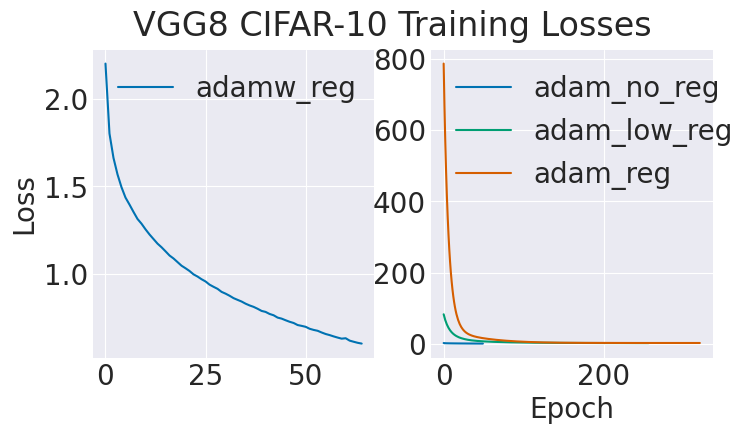

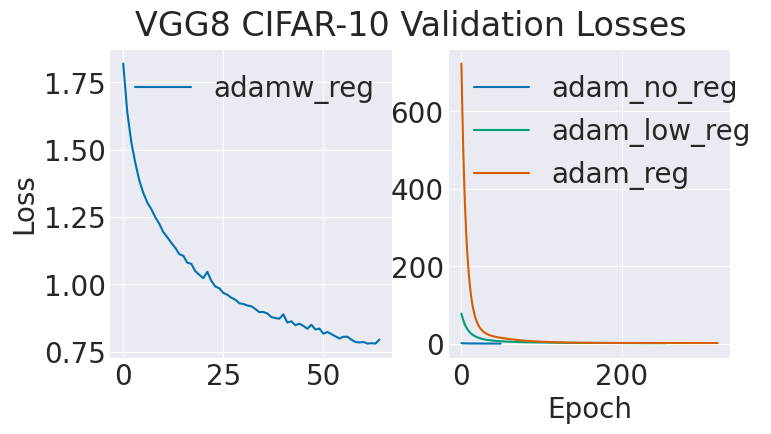

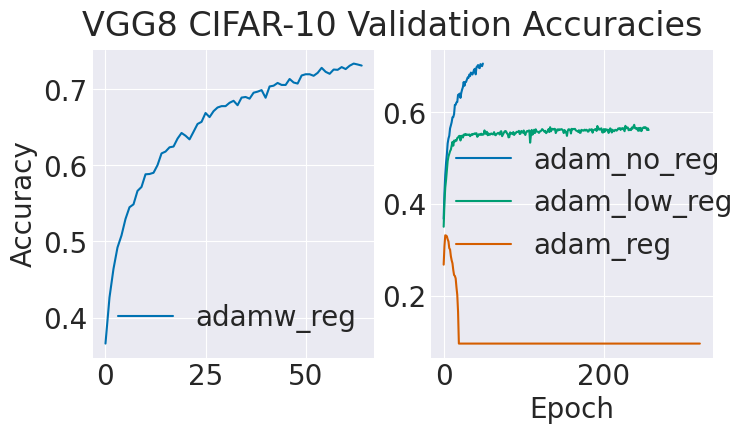

Test accuracies:
adamw_reg: 70.82%
adam_no_reg: 68.79%
adam_low_reg: 55.36%
adam_reg: 10.02%


In [16]:
#load in data for each optimizer
train_losses = [results['adamw']['train_loss_hist'], results['adam_no_reg']['train_loss_hist'], results['adam_low_reg']['train_loss_hist'], results['adam_reg']['train_loss_hist']]
val_losses = [results['adamw']['val_loss_hist'], results['adam_no_reg']['val_loss_hist'], results['adam_low_reg']['val_loss_hist'], results['adam_reg']['val_loss_hist']]
val_accs = [results['adamw']['val_acc_hist'], results['adam_no_reg']['val_acc_hist'], results['adam_low_reg']['val_acc_hist'], results['adam_reg']['val_acc_hist']]
test_accs = [results['adamw']['test_acc'], results['adam_no_reg']['test_acc'], results['adam_low_reg']['test_acc'], results['adam_reg']['test_acc']]
#plotting function




def plot_hist_optimizer_exp(adamw_hist, adam_hists, adam_labels=['adam_no_reg', 'adam_low_reg', 'adam_reg'],
                            title='',
                            ylabel=''):
    '''Plots either the training loss history, val loss history, or val acc history for the nets trained with adam and
    adamw.

    This plotting function is provided to you. Feel free to modify to suit your needs.

    Parameters:
    -----------
    adamw_hist: array-like. len(hist_nodropout)=E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the net trained with Adam.
    adam_hists: list of lists. len(hists)=3. len(sublists) = E, where E is number of epochs used to train.
        The training loss, val loss, OR val acc history for the 3 networks.
    labels: list of str.
        The labels/order of conditions in adam_hists. Modify if your order does not match the default.
    title: str.
        A useful title.
    ylabel: str.
        A useful y label.
    '''
    fig, axes = plt.subplots(ncols=2, figsize=(8,4))

    axes[0].plot(adamw_hist, label='adamw_reg')
    for i in range(len(adam_labels)):
        axes[1].plot(adam_hists[i], label=adam_labels[i])

    axes[0].legend()
    axes[1].legend()
    fig.suptitle(title)
    axes[0].set_ylabel(ylabel)
    axes[1].set_xlabel('Epoch')
    plt.show()

# Define labels for the plots
all_labels = ['adamw_reg', 'adam_no_reg', 'adam_low_reg', 'adam_reg']

# Plot training losses
plot_hist_optimizer_exp(train_losses[0], train_losses[1:], adam_labels=all_labels[1:], title='VGG8 CIFAR-10 Training Losses', ylabel='Loss')

# Plot validation losses
plot_hist_optimizer_exp(val_losses[0], val_losses[1:], adam_labels=all_labels[1:], title='VGG8 CIFAR-10 Validation Losses', ylabel='Loss')

# Plot validation accuracies
plot_hist_optimizer_exp(val_accs[0], val_accs[1:], adam_labels=all_labels[1:], title='VGG8 CIFAR-10 Validation Accuracies', ylabel='Accuracy')

# Print test accuracies
print('Test accuracies:')
for i in range(len(all_labels)):
    print(f'{all_labels[i]}: {100*test_accs[i]:.2f}%')

### 7c. Questions

**Question 10:** What effect does regularization have with Adam? When does it perform best/worst? How do you know?

**Question 11:** How does the results with AdamW compare with the nets trained with Adam?

**Answer 10:** Since Adam relies on scaling gradients, and regularization affects the gradients, it ends up with the worst performance with 0.1 accuracy and takes an abormal amount of time to stop w/ patience 4 at 0.6 reg. This scales with the regularization value, where the lower regularization value took less time and resulted in a better accuracy, but the best accuracy at ~0.69 and shortest time was Adam without any regularization at all.

**Answer 11:** AdamW performed a few percent better than the best Adam result, at ~0.71 and a very short stopping time.

## Task 8: Going even deeper with VGG15

This network is an approximation of the VGG19 network from the VGG paper. This is a big and deep model:
- 5 conv blocks. First two blocks have 2 conv layers, each. The remaining blocks have 3 conv layers each. There is no dropout in any of the conv blocks.
- flatten layer.
- 1 dense block with dropout.
- 1 dense output layer with softmax activation.

In this task, the goal is to implement VGG15 and assess its baseline accuracy on CIFAR-10.

### 8a. Implement and test VGG15

If you copy-paste from VGG8, this should be fast.

In [5]:
from vgg_nets import VGG15

#### Test: `VGG15`

In [6]:
v = VGG15(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

I0000 00:00:1740968143.866233     394 cuda_dnn.cc:529] Loaded cuDNN version 90300


---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(Flatten) shape: [1, 512]
ConvBlock5:
	MaxPool2D layer output(ConvBlock5/maxpool) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	MaxPool2D layer output(ConvBlock4/maxpool) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_0) shape: [1, 4, 4, 512]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv_1

The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv0) shape: [1, 2, 2, 512]
ConvBlock4:
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv0) shape: [1, 4, 4, 512]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv2) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 8, 8, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool2) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv0) shape: [1, 16, 16, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool2) shape: [1, 16, 16, 64]
	Conv2D layer output(ConvBlock1/conv1) shape: [1, 32, 32, 64]
	Conv2D layer output(ConvBlock1/conv0) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
```


In [7]:
tf.random.set_seed(0)
v = VGG15(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([3, 32, 32, 3]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.096 0.298 0.203 0.319 0.084]
 [0.089 0.278 0.216 0.33  0.087]
 [0.087 0.277 0.214 0.345 0.078]]''')

Your net_acts are
[[0.096 0.298 0.203 0.319 0.084]
 [0.089 0.278 0.216 0.33  0.087]
 [0.087 0.277 0.214 0.344 0.078]] and should be
[[0.096 0.298 0.203 0.319 0.084]
 [0.089 0.278 0.216 0.33  0.087]
 [0.087 0.277 0.214 0.345 0.078]]


### 8b. Train VGG15 on CIFAR-10

Here is how you should setup training:
1. Train with patience of `4`.
2. Use He initialization.
3. Use AdamW and regularization of `0.6`.

Store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).

**Notes:**
- Set random seed at the beginning for consistency.
- Use `tf.keras.backend.clear_session()` at the beginning to help prevent the memory used from growing.

In [22]:
tf.random.set_seed(0)
tf.keras.backend.clear_session()

# Create and compile model with dropout
model = VGG15(C=10, input_feats_shape=(32, 32, 3), wt_init='he', conv_dropout=False, reg=0.6)
model.compile(optimizer='adamw', lr=1e-5)

# Train model
train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(x_train, y_train, x_val, y_val, patience=4)

# Evaluate on test set
test_acc, test_loss = model.evaluate(x_test, y_test)

# Store results
results = (test_acc, epochs, train_loss_hist, val_loss_hist, val_acc_hist)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')
print(f'Training epochs: {epochs}')



---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout_0) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(Flatten) shape: [1, 512]
ConvBlock5:
	MaxPool2D layer output(ConvBlock5/maxpool) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	MaxPool2D layer output(ConvBlock4/maxpool) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_0) shape: [1, 4, 4, 512]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv_

In the cell below, plot the VGG15 train and validation loss history over epochs. Place the test acc in the title.

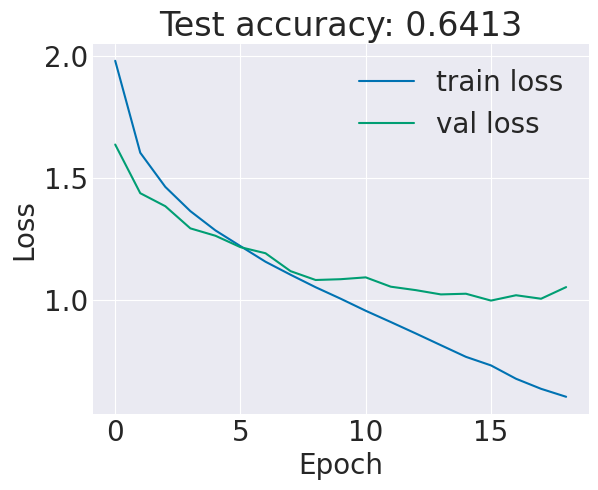

In [23]:
plt.plot(train_loss_hist, label='train loss')
plt.plot(val_loss_hist, label='val loss')
plt.title(f'Test accuracy: {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 8c. Questions

**Question 12:** How does the baseline accuracy of VGG15 compare to the best accuracies you achieved with the shallower networks? Did this surprise you?

**Answer 12:** Yes, I expected it to perform better given that it is a deeper network. Instead, it only had an accuracy of ~0.64, quite a bit lower than VGG8 with AdamW and reg. Perhaps it needs to be further tuned or requires more patience in order to achieve better accuracy.